<a href="https://www.kaggle.com/code/piyushjain572/feature-scaling-normalization?scriptVersionId=199138025" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/wine-data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [5]:
df.describe()

,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Class label']),
                                                df['Class label'],
                                                test_size=0.2,
                                                random_state=2)
print(X_train.shape,X_test.shape)

(142, 2) (36, 2)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [11]:
X_train_scaled

,Alcohol,Malic acid
0,0.407895,0.081466
1,0.110526,0.307536
2,0.276316,0.089613
3,0.436842,0.130346
4,0.739474,0.657841
...,...,...
137,0.581579,0.629328
138,0.705263,0.197556
139,0.647368,0.156823
140,0.684211,0.187373


In [12]:
X_train

,Alcohol,Malic acid
154,12.58,1.29
120,11.45,2.40
89,12.08,1.33
92,12.69,1.53
156,13.84,4.12
...,...,...
43,13.24,3.98
22,13.71,1.86
72,13.49,1.66
15,13.63,1.81


# Effect of Scaling

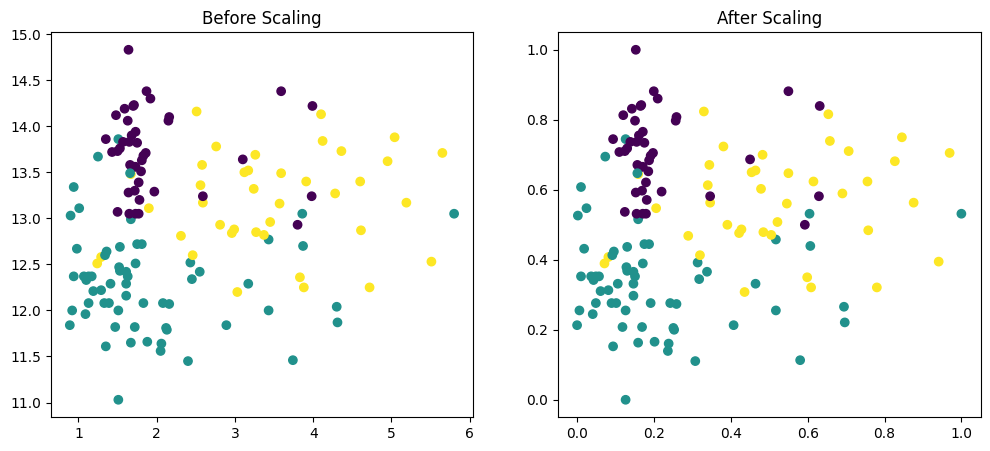

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Malic acid'], X_train['Alcohol'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Malic acid'], X_train_scaled['Alcohol'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

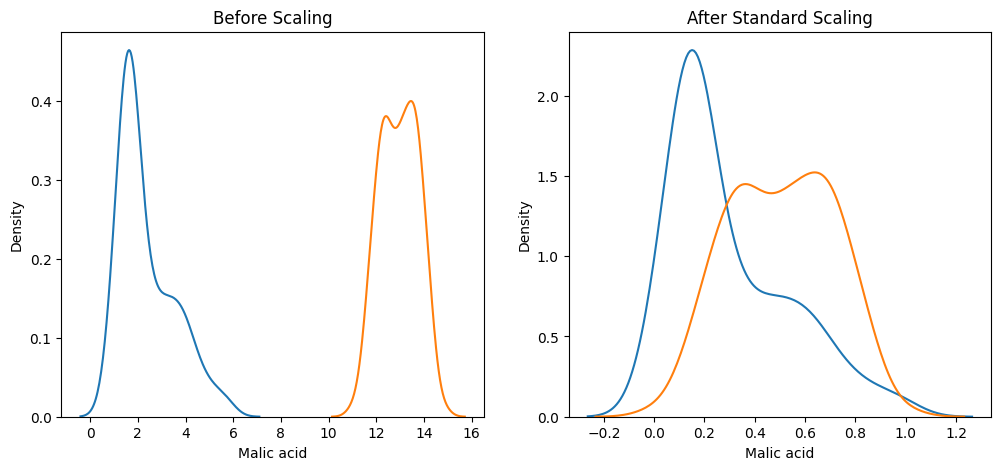

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

# Effect on Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'After Scaling'}, xlabel='Malic acid', ylabel='Density'>

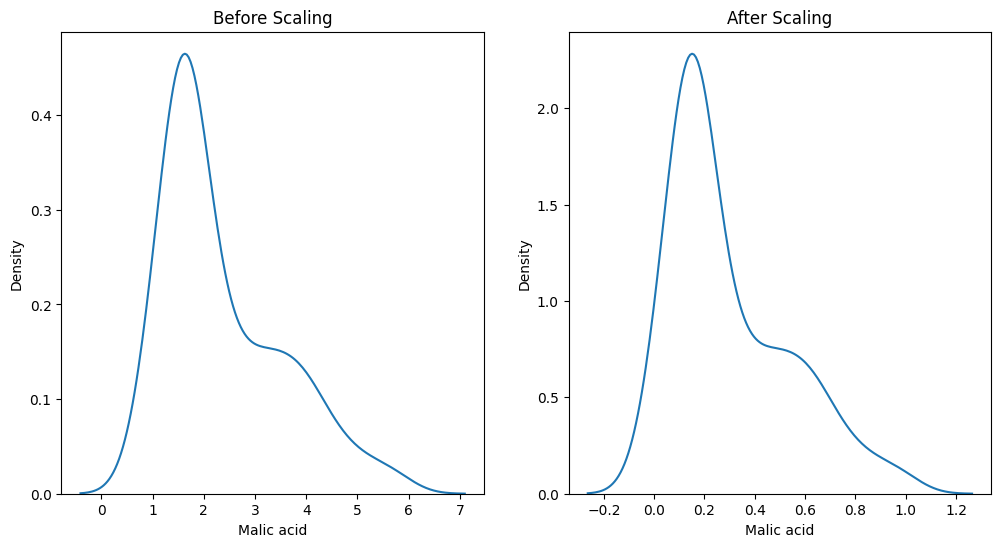

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

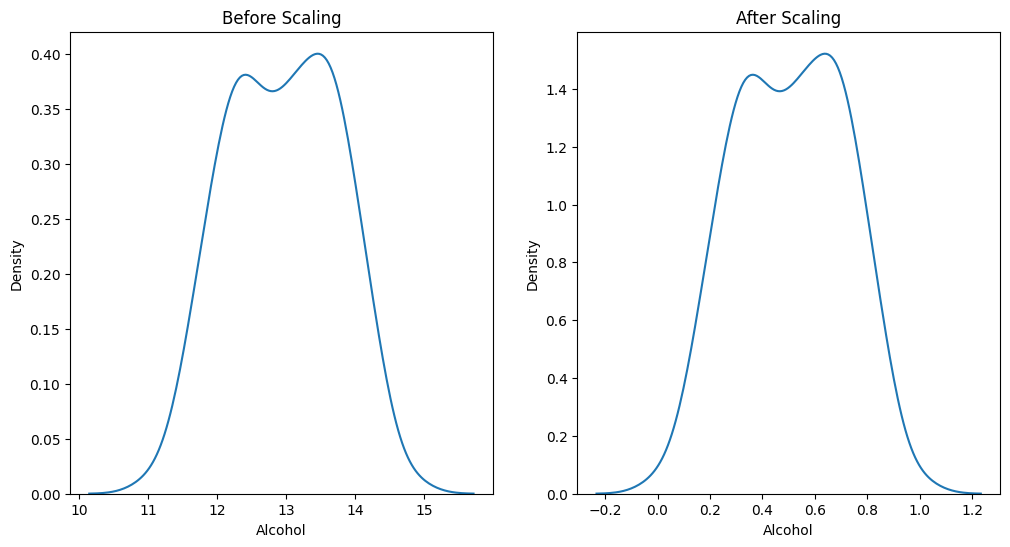

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)

# Effect on Outliers
## MinMax - Not Robust to Outliers
## Robust - Robust to Outliers

In [20]:
df = pd.concat([df,pd.DataFrame({
    'Malic acid' : [0.01,14.7,15.8],
    'Alcohol' : [2.08,40.90,45.4],
    'Class label' : [1,2,3]
})],ignore_index=True)
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
176,3,13.17,2.59
177,3,14.13,4.10
178,1,2.08,0.01
179,2,40.90,14.70


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Class label']),
                                                df['Class label'],
                                                test_size=0.2,
                                                random_state=2)
print(X_train.shape,X_test.shape)

(144, 2) (37, 2)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.columns)

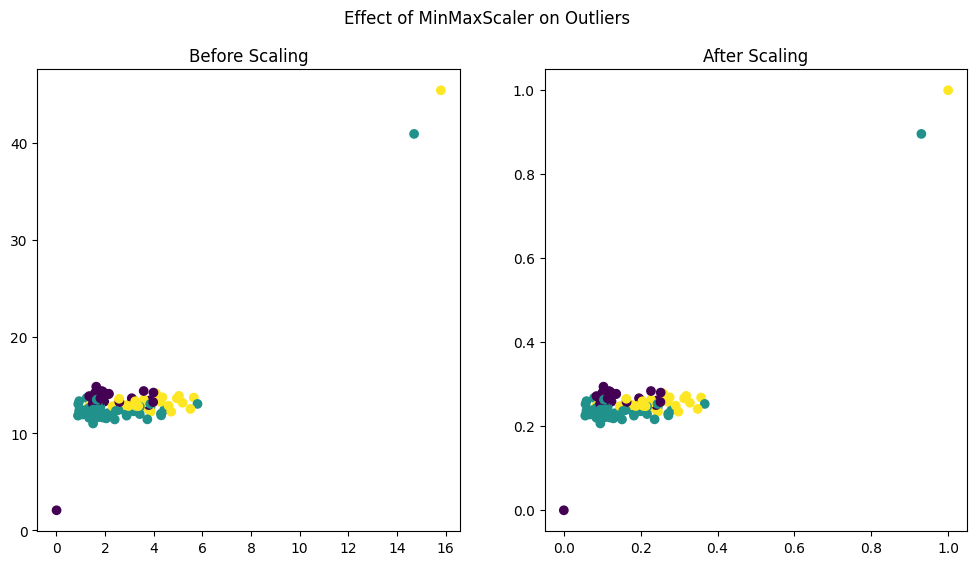

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.scatter(X_train['Malic acid'], X_train['Alcohol'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Malic acid'], X_train_scaled['Alcohol'],c=y_train)
ax2.set_title("After Scaling")
fig.suptitle('Effect of MinMaxScaler on Outliers')
plt.show()

In [32]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
scale.fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.columns)

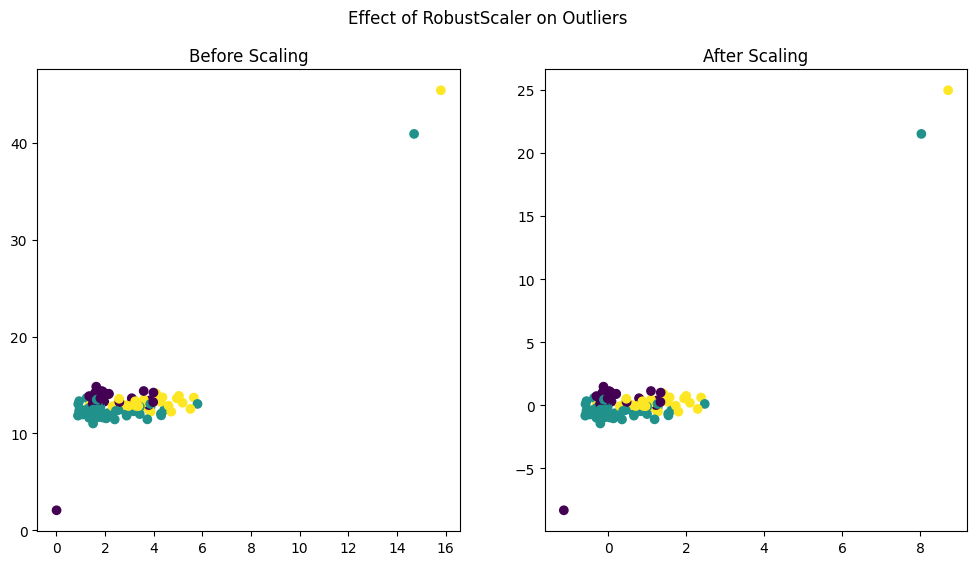

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.scatter(X_train['Malic acid'], X_train['Alcohol'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Malic acid'], X_train_scaled['Alcohol'],c=y_train)
ax2.set_title("After Scaling")
fig.suptitle('Effect of RobustScaler on Outliers')
plt.show()